# HTML to PptxGenJS Translator

This notebook demonstrates how to translate HTML slides to PptxGenJS code.

In [3]:
import sys
import os
import re
import json
from bs4 import BeautifulSoup
import textwrap
from IPython.display import display, HTML

In [4]:
# Add parent directory to path to import from your existing modules
sys.path.append("../")
from pptx_generation.planner import Planner
from pptx_generation.generation import Generator
from htmlrender.renderer import HTMLRenderer
from llm.llmwrapper import LLM

In [110]:
# Initialize your existing components
llm1 = LLM(provider="gemini", model="gemini-2.0-flash")
llm2 = LLM(provider="gemini", model="gemini-2.5-flash")
llm3 = LLM(provider="gemini", model="gemini-2.5-pro")

planner = Planner()
generator = Generator()
renderer = HTMLRenderer()

INFO:root:LLM initialized
INFO:root:Provider: gemini
INFO:root:Model: gemini-2.0-flash
INFO:root:LLM initialized
INFO:root:Provider: gemini
INFO:root:Model: gemini-2.5-flash
INFO:root:LLM initialized
INFO:root:Provider: gemini
INFO:root:Model: gemini-2.5-pro


## Step 1: Generate HTML Slides

First, we'll use your existing pipeline to generate HTML slides.

In [6]:
# Sample query to generate a presentation
query = "Make a short presentation about AI-powered document search systems"

# Generate presentation plan using the Planner
print("Generating presentation plan...")
presentation_plan = planner.plan_content(query=query, llm_1=llm1)
print("Plan generated!")

2025-07-06 03:16:47.367 | INFO     | pptx_generation.planner:brainstorm:25 - PPTX Planning STEP 1: Brainstorming implementation approach based on user query...
                    QUERY: "Make a short presentation about AI-powered document search systems"

INFO:google_genai.models:AFC is enabled with max remote calls: 10.


Generating presentation plan...


INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-06 03:16:59.957 | INFO     | pptx_generation.planner:brainstorm:35 - PPTX Planning STEP 1: Brainstorming complete!
2025-07-06 03:16:59.959 | INFO     | pptx_generation.planner:outline:70 - PPTX Planning STEP 2: Creating high-level Presentation outline...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-06 03:17:13.769 | INFO     | pptx_generation.planner:outline:74 - PPTX Planning STEP 2: Outline creation complete!
2025-07-06 03:17:13.769 | INFO     | pptx_generation.planner:slide_content:111 - PPTX Planning STEP 3: Defining the content to appear on each slide...
INFO:google_genai.

Plan generated!


2025-07-06 03:17:36.422 | INFO     | pptx_generation.generation:generate_title_slide:82 - Generating title slide...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-06 03:18:06.987 | INFO     | pptx_generation.generation:generate_title_slide:90 - Reviewing generated HTML...
2025-07-06 03:18:12.673 | INFO     | htmlrender.renderer:renderHTML:12 - Saving rendered HTML image to temp file: c:\Users\HaiNT84\source\pptx-planner\experimentation\html_render.png
2025-07-06 03:18:12.802 | INFO     | htmlrender.renderer:renderHTML:26 - Temp file removed: c:\Users\HaiNT84\source\pptx-planner\experimentation\html_render.png
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-fl

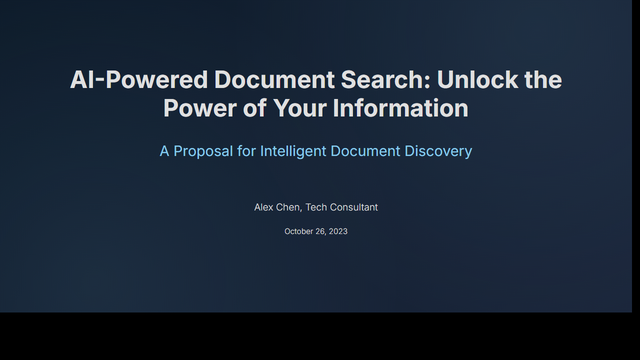

In [7]:
# Generate title slide
title_slide_content = presentation_plan['processed_slide_content']['slide_content']['slide_1']
title_slide_html = generator.generate_title_slide(query=query, slide_content=title_slide_content, generator_llm=llm2, reviewer_llm=llm2)

# Display the title slide
title_slide_img = renderer.renderHTML(html_str=title_slide_html, resize=True, resize_ratio=0.5)
display(title_slide_img)

2025-07-06 03:18:20.302 | INFO     | pptx_generation.generation:generate_agenda_slide:136 - Generating Agenda slide...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-06 03:18:47.098 | INFO     | pptx_generation.generation:generate_agenda_slide:145 - Reviewing generated HTML...
2025-07-06 03:18:49.069 | INFO     | htmlrender.renderer:renderHTML:12 - Saving rendered HTML image to temp file: c:\Users\HaiNT84\source\pptx-planner\experimentation\html_render.png
2025-07-06 03:18:49.089 | INFO     | htmlrender.renderer:renderHTML:26 - Temp file removed: c:\Users\HaiNT84\source\pptx-planner\experimentation\html_render.png
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2

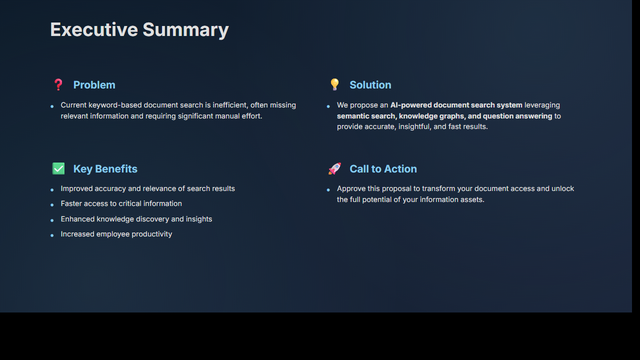

In [8]:
# Generate agenda slide
agenda_slide_content = presentation_plan['processed_slide_content']['slide_content']['slide_2']
agenda_slide_html = generator.generate_agenda_slide(query=query, slide_content=agenda_slide_content, title_slide_html=title_slide_html, generator_llm=llm2, reviewer_llm=llm2)

# Display the agenda slide
agenda_slide_img = renderer.renderHTML(html_str=agenda_slide_html, resize=True, resize_ratio=0.5)
display(agenda_slide_img)

In [106]:
agenda_slide_html

'<!DOCTYPE html>\n<html lang="en">\n<head>\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <title>AI-Powered Document Search - Executive Summary</title>\n    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;700&display=swap" rel="stylesheet">\n    <style>\n        /* CSS Variables for easy customization and consistency */\n        :root {\n            --slide-width: 1280px;\n            --slide-height: 720px;\n            --primary-bg-color-dark: #0D1B2A; /* Deep, sophisticated dark blue */\n            --secondary-bg-color-dark: #1B263B; /* Slightly lighter dark blue for gradient depth */\n            --text-color-light: #E0E0E0; /* Off-white for main text, high contrast */\n            --accent-color: #88CCEE; /* Muted teal/cyan for highlights and subtitle */\n            --font-family-primary: \'Inter\', sans-serif;\n\n            /* Font sizes for Title Slide (kept for consistency, though not all us

2025-07-06 03:18:56.372 | INFO     | pptx_generation.generation:generate_general_slide:187 - Generating slide...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-06 03:19:28.863 | INFO     | pptx_generation.generation:generate_general_slide:195 - Reviewing generated HTML...
2025-07-06 03:19:30.902 | INFO     | htmlrender.renderer:renderHTML:12 - Saving rendered HTML image to temp file: c:\Users\HaiNT84\source\pptx-planner\experimentation\html_render.png
2025-07-06 03:19:30.921 | INFO     | htmlrender.renderer:renderHTML:26 - Temp file removed: c:\Users\HaiNT84\source\pptx-planner\experimentation\html_render.png
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-fl

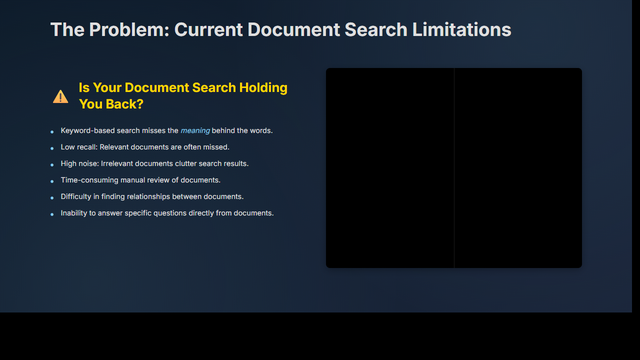

In [9]:
# Generate one more slide for testing
existing_slide_content = [
    {'name': 'Title slide', 'html': title_slide_html},
    {'name': 'Agenda slide', 'html': agenda_slide_html}
]

slide_3_content = presentation_plan['processed_slide_content']['slide_content']['slide_3']
slide_3_html = generator.generate_general_slide(query=query, slide_content=slide_3_content, existing_slide_content=existing_slide_content, generator_llm=llm2, reviewer_llm=llm2)

# Display the third slide
slide_3_img = renderer.renderHTML(html_str=slide_3_html, resize=True, resize_ratio=0.5)
display(slide_3_img)

In [10]:
# Collect all slides for translation
all_slides = [
    {'name': 'Title slide', 'html': title_slide_html},
    {'name': 'Agenda slide', 'html': agenda_slide_html},
    {'name': 'Slide 3', 'html': slide_3_html}
]

## Step 2: LLM-Based Translation

In [120]:
def llm_html_to_pptxgenjs(html_content, slide_name, llm):
    """
    Use LLM to translate HTML to PptxGenJS code with improved prompt and validation
    """
    prompt = textwrap.dedent(f"""
    You are an expert JavaScript developer specializing in PptxGenJS. Convert this HTML slide to PptxGenJS code.
    
    CRITICAL RULES - FOLLOW EXACTLY:
    1. Generate a COMPLETE function called createPresentation()
    2. ALWAYS start with: const pptx = new PptxGenJS();
    3. ALWAYS end with: return pptx.writeFile({{ fileName: 'presentation.pptx' }});
    4. Use ONLY simple addText() calls - NO complex nested objects
    5. Colors MUST be literal strings: color: 'E0E0E0' (NOT variables)
    
    POSITIONING RULES - CRITICAL FOR PROPER LAYOUT:
    6. SLIDE DIMENSIONS: Standard slide is 10 inches wide × 5.625 inches tall
    7. SAFE MARGINS: Keep content between x: 0.5-9.5 and y: 0.5-5.0
    8. TITLE POSITIONING: Main titles at y: 0.5-1.0, subtitles at y: 1.2-1.8
    9. CONTENT SPACING: Leave 0.3-0.5 inches between text blocks vertically
    10. GRID LAYOUTS: For 2-column layouts use x: 0.5,5.25 with w: 4.0 each
    11. TEXT WIDTH: Always specify w: (width) to prevent text overflow
    12. VERTICAL FLOW: Start content at y: 2.0, increment by 0.8-1.0 per section
    
    LAYOUT GUIDELINES:
    13. For backgrounds: slide.background = {{ color: '0D1B2A' }};
    14. For bullet points: Use simple text with bullet symbols or newlines
    15. NO overlapping elements - check y positions don't conflict
    16. Keep it SIMPLE - one addText() call per text element
    
    HTML to convert:
    {html_content}
    
    Follow these SIMPLE examples EXACTLY:
    
    EXAMPLE 1 - Properly positioned title slide:
    ```javascript
    function createPresentation() {{
        const pptx = new PptxGenJS();
        const slide = pptx.addSlide();
        
        slide.background = {{ color: '0D1B2A' }};
        
        // Main title - centered, safe margins
        slide.addText('AI-Powered Document Search', {{
            x: 0.5,
            y: 0.8,
            w: 9.0,
            h: 1.2,
            fontSize: 36,
            color: 'E0E0E0',
            bold: true,
            align: 'center'
        }});
        
        // Subtitle - proper spacing below title
        slide.addText('A Proposal for Intelligent Document Discovery', {{
            x: 0.5,
            y: 2.2,
            w: 9.0,
            h: 0.8,
            fontSize: 18,
            color: '88CCEE',
            align: 'center'
        }});
        
        // Author - bottom section
        slide.addText('Alex Chen, Tech Consultant', {{
            x: 0.5,
            y: 4.0,
            w: 9.0,
            h: 0.5,
            fontSize: 16,
            color: 'E0E0E0',
            align: 'center'
        }});
        
        return pptx.writeFile({{ fileName: 'presentation.pptx' }});
    }}
    ```
    
    EXAMPLE 2 - Properly spaced 2x2 grid layout (Executive Summary style):
    ```javascript
    function createPresentation() {{
        const pptx = new PptxGenJS();
        const slide = pptx.addSlide();
        
        slide.background = {{ color: '0D1B2A' }};
        
        // Title - proper top positioning
        slide.addText('Executive Summary', {{
            x: 0.5,
            y: 0.5,
            w: 9.0,
            h: 0.8,
            fontSize: 32,
            color: 'E0E0E0',
            bold: true
        }});
        
        // TOP-LEFT: Problem section
        slide.addText('❓ Problem', {{
            x: 0.5,
            y: 1.5,
            w: 4.0,
            h: 0.5,
            fontSize: 18,
            color: 'FF6B6B',
            bold: true
        }});
        
        slide.addText('Current keyword-based search is inefficient', {{
            x: 0.5,
            y: 2.1,
            w: 4.0,
            h: 1.0,
            fontSize: 12,
            color: 'E0E0E0'
        }});
        
        // TOP-RIGHT: Solution section
        slide.addText('💡 Solution', {{
            x: 5.25,
            y: 1.5,
            w: 4.0,
            h: 0.5,
            fontSize: 18,
            color: '4ECDC4',
            bold: true
        }});
        
        slide.addText('AI-powered semantic search system', {{
            x: 5.25,
            y: 2.1,
            w: 4.0,
            h: 1.0,
            fontSize: 12,
            color: 'E0E0E0'
        }});
        
        // BOTTOM-LEFT: Benefits section
        slide.addText('✅ Key Benefits', {{
            x: 0.5,
            y: 3.4,
            w: 4.0,
            h: 0.5,
            fontSize: 18,
            color: '95E1D3',
            bold: true
        }});
        
        slide.addText('• Improved search relevance\n• Faster access to information', {{
            x: 0.5,
            y: 4.0,
            w: 4.0,
            h: 1.0,
            fontSize: 12,
            color: 'E0E0E0'
        }});
        
        // BOTTOM-RIGHT: Call to Action
        slide.addText('🚀 Call to Action', {{
            x: 5.25,
            y: 3.4,
            w: 4.0,
            h: 0.5,
            fontSize: 18,
            color: 'F38BA8',
            bold: true
        }});
        
        slide.addText('Approve this proposal to transform document access', {{
            x: 5.25,
            y: 4.0,
            w: 4.0,
            h: 1.0,
            fontSize: 12,
            color: 'E0E0E0'
        }});
        
        return pptx.writeFile({{ fileName: 'presentation.pptx' }});
    }}
    ```
    
    CRITICAL SYNTAX RULES - THESE PREVENT ERRORS:
    1. Colors: ALWAYS use quoted strings like color: 'E0E0E0' (NEVER color: 'textColorLight,')
    2. Properties: NEVER add extra quotes like bold: true',' (CORRECT: bold: true)
    3. Objects: NEVER break object syntax like {{ fontSize: 18, color: 'accentColor, bold: true }}
    4. NO nested text objects - keep each addText() call simple
    5. NO variable references in strings - use actual color values
    6. For multiple bullet points, use newlines: 'First point\nSecond point'
    7. ALWAYS close all quotes, brackets, and parentheses properly
    
    POSITIONING VALIDATION - PREVENT OVERLAPS:
    8. CHECK Y-POSITIONS: Ensure no two elements have overlapping y-ranges
    9. TITLE ZONE: y: 0.5-1.3 (reserve for main titles only)
    10. CONTENT ZONES: Start at y: 1.5+ with 0.8+ spacing between sections
    11. GRID COLUMNS: Left column x: 0.5, Right column x: 5.25 (never overlap)
    12. ALWAYS specify both w: and h: to control text box boundaries
    13. Use the EXACT positioning from examples - don't improvise
    
    Generate ONLY the JavaScript function. Keep it simple and syntactically correct.
    """)
    
    response = llm.call(query=prompt)
    code = response['text']
    
    # Clean up the response to remove any markdown code blocks
    code = code.replace('```javascript', '').replace('```js', '').replace('```', '')
    
    # RULE-BASED CLEANUP: Remove problematic statements
    import re
    
    # Remove import/require statements
    code = re.sub(r'.*\\b(import|require)\\b.*', '', code)
    
    # DON'T remove pptx declarations - they are needed!
    # DON'T remove writeFile calls - they are needed!
    
    # Remove function wrappers
    code = re.sub(r'.*function\\s+\\w+.*\\{.*', '', code)
    code = re.sub(r'^\\s*\\}\\s*$', '', code, flags=re.MULTILINE)
    
    # Remove export statements
    code = re.sub(r'.*(export|module\\.exports).*', '', code)
    
    # Simplify complex gradient backgrounds to solid colors
    gradient_pattern = r'slide\.background\s*=\s*\{[^}]*fill:\s*\{[^}]*gradient[^}]*\}[^}]*\}'
    code = re.sub(gradient_pattern, 'slide.background = { color: \'1B263B\' }', code, flags=re.DOTALL)
    
    # Basic validation to ensure proper color formatting
    
    # Find patterns like color: #FFFFFF or color: FFFFFF (without quotes)
    color_pattern = r'color:\s*([^\'\"]+)([,}])'
    code = re.sub(color_pattern, lambda m: f'color: \'{m.group(1).strip()}\'{m.group(2)}', code)
    
    # Find patterns like { color: #FFFFFF } or { color: FFFFFF } (without quotes)
    obj_color_pattern = r'{\s*color:\s*([^\'\"]+)([,}])'
    code = re.sub(obj_color_pattern, lambda m: f'{{ color: \'{m.group(1).strip()}\'{m.group(2)}', code)
    
    # Check for unclosed string literals
    def fix_unclosed_strings(code):
        lines = code.split('\n')
        for i, line in enumerate(lines):
            # Check for lines with odd number of single quotes (likely unclosed string)
            if line.count("'") % 2 != 0 and "'" in line:
                # Add closing quote at the end if it seems to be missing
                if not line.strip().endswith("'"):
                    lines[i] = line + "'"
        return '\n'.join(lines)
    
    code = fix_unclosed_strings(code)
    
    # Replace any variable references in color values with literal strings
    var_in_color_pattern = r'color:\s*\'([^\']*\$\{[^}]*\}[^\']*)\'([,}])'
    code = re.sub(var_in_color_pattern, lambda m: f'color: \'000000\'{m.group(2)}', code)
    
    var_name_pattern = r'color:\s*([a-zA-Z][a-zA-Z0-9_]*)([,}])'
    code = re.sub(var_name_pattern, lambda m: f'color: \'000000\'{m.group(2)}', code)
    
    # Fix specific syntax errors found in complex slides
    # Fix: color: 'textColorLight,' -> color: 'E0E0E0',
    code = re.sub(r'color:\s*\'[^\',}]*,', 'color: \'E0E0E0\',', code)
    
    # Fix: bold: true',' -> bold: true,
    code = re.sub(r'(bold|italic):\s*true\'[,}]', r'\1: true,', code)
    
    # Fix broken object syntax
    code = re.sub(r'color:\s*\'[^\',}]*,\s*bold:', 'color: \'88CCEE\', bold:', code)
    
    # POSITIONING VALIDATION: Fix common positioning issues
    # Fix out-of-bounds x positions (keep within 0.5-9.5)
    def fix_x_position(match):
        value = float(match.group(1))
        fixed_value = min(9.5, max(0.5, value))
        return f'x: {fixed_value}'
    
    code = re.sub(r'x:\s*([0-9]+\.?[0-9]*)', fix_x_position, code)
    
    # Fix out-of-bounds y positions (keep within 0.5-5.0)
    def fix_y_position(match):
        value = float(match.group(1))
        fixed_value = min(5.0, max(0.5, value))
        return f'y: {fixed_value}'
    
    code = re.sub(r'y:\s*([0-9]+\.?[0-9]*)', fix_y_position, code)
    
    # Final validation: Ensure complete function structure
    code = code.strip()
    
    # Check if it's a complete function
    if not code.startswith('function createPresentation()'):
        # If not, wrap the code in a proper function
        if not 'const pptx = new PptxGenJS()' in code:
            code = 'const pptx = new PptxGenJS();\n' + code
        if not 'const slide = pptx.addSlide()' in code:
            code = 'const slide = pptx.addSlide();\n' + code
        if not 'return pptx.writeFile' in code:
            code = code + '\n\nreturn pptx.writeFile({ fileName: \'llm-generated-presentation.pptx\' });'
        
        # Wrap in function
        code = f'function createPresentation() {{\n    {code.replace(chr(10), chr(10) + "    ")}\n}}'
    
    # Remove empty lines but keep structure
    lines = [line for line in code.split('\n') if line.strip()]
    code = '\n'.join(lines)
    
    return code

In [121]:
# Test LLM-based translation for one slide
llm_full_script1 = llm_html_to_pptxgenjs(title_slide_html, "Title Slide", llm3)
llm_full_script2 = llm_html_to_pptxgenjs(agenda_slide_html, "Agenda Slide", llm3)
llm_full_script3 = llm_html_to_pptxgenjs(slide_3_html, "Slide 3", llm3)

INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-pro:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-pro:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-pro:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.


## Step 5: Generate PPTX File Using Node.js

In [123]:
# Create Node.js scripts for LLM-based approach
llm_based_node_script1 = f"""
const PptxGenJS = require('pptxgenjs');
{llm_full_script1}
createPresentation()
    .then(() => {{
        console.log('LLM-based PPTX file generated successfully!');
        console.log('File saved as: llm-generated-presentation.pptx');
    }})
    .catch(error => {{
        console.error('Error generating presentation:', error);
    }});
"""

with open("llm_based_generate1_pptx.js", "w") as f:
    f.write(llm_based_node_script1)

llm_based_node_script2 = f"""
const PptxGenJS = require('pptxgenjs');
{llm_full_script2}
createPresentation()
    .then(() => {{
        console.log('LLM-based PPTX file generated successfully!');
        console.log('File saved as: llm-generated-presentation.pptx');
    }})
    .catch(error => {{
        console.error('Error generating presentation:', error);
    }});
"""

with open("llm_based_generate2_pptx.js", "w") as f:
    f.write(llm_based_node_script2)
    
llm_based_node_script3 = f"""
// Import PptxGenJS
const PptxGenJS = require('pptxgenjs');
{llm_full_script3}

createPresentation()
    .then(() => {{
        console.log('LLM-based PPTX file generated successfully!');
        console.log('File saved as: llm-generated-presentation.pptx');
    }})
    .catch(error => {{
        console.error('Error generating presentation:', error);
    }});
"""

with open("llm_based_generate3_pptx.js", "w") as f:
    f.write(llm_based_node_script3)

In [126]:
# Run the Node.js scripts to generate the PPTX files
import subprocess
import os

def run_node_script(script_path, output_file):
    try:
        # Run the Node.js script
        result = subprocess.run(["node", script_path], 
                               check=True, 
                               capture_output=True, 
                               text=True)
        
        print(result.stdout)
        
        # Check if the file was created
        if os.path.exists(output_file):
            print(f"File created: {os.path.abspath(output_file)}")
            return True
        else:
            print(f"Warning: {output_file} not found in the expected location.")
            return False
            
    except subprocess.CalledProcessError as e:
        print(f"Error running Node.js script: {e}")
        print(f"Error output: {e.stderr}")
        print("\nMake sure you have Node.js installed and have run 'npm install pptxgenjs'")
        return False

try:
    # Run LLM-based approach
    print("\n--- LLM-BASED APPROACH ---")
    llm_based_success = run_node_script("llm_based_generate2_pptx.js", "presentation2.pptx")
    
    # Summary
    print("\n--- SUMMARY ---")
    print(f"LLM-based approach: {'Success' if llm_based_success else 'Failed'}")
    
except FileNotFoundError:
    print("Error: Node.js not found. Please install Node.js from https://nodejs.org/")


--- LLM-BASED APPROACH ---
LLM-based PPTX file generated successfully!
File saved as: llm-generated-presentation.pptx

File created: c:\Users\HaiNT84\source\pptx-planner\experimentation\presentation2.pptx

--- SUMMARY ---
LLM-based approach: Success
